<a href="https://colab.research.google.com/github/mohmmadhadi/DEMproblemset/blob/main/DEM_Problem_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing necessary libraries

In [ ]:
!pip install pandas fredapi

In [ ]:
import pandas as pd
import numpy as np
from fredapi import Fred
from statsmodels.tsa.filters.hp_filter import hpfilter
import matplotlib.pyplot as plt

#Table 1

##Replicating

In [ ]:
# Correct API key usage
api_key = '4e19e02bcc5735b08a15d417b99e7c8e'

# Initialize the Fred object with the API key
fred = Fred(api_key=api_key)

# List of variables to download from FRED with correct series IDs
variables = {
    'GDP': 'GDP',                   # Gross Domestic Product
    'CND': 'PCEND',              # Personal Consumption Expenditures: Nondurable Goods
    'CD': 'PCEDG',               # Personal Consumption Expenditures: Durable Goods
    'H': 'HOANBS',            # Nonfarm Business Sector: Hours Worked
    'AveH': 'AWHMAN',               # Average Weekly Hours of Production and Nonsupervisory Employees: Manufacturing
    'L': 'PAYEMS',                  # All Employees: Total Nonfarm
    'AveW': 'AHETPI'         # Average Hourly Earnings of Production and Nonsupervisory Employees: Total Private
}

# Download data
data = {var: fred.get_series(series_id) for var, series_id in variables.items()}


In [ ]:
# Convert data to DataFrame and compute necessary transformations
df = pd.DataFrame(data)
df = df.resample('Q').mean()  # Resample to quarterly data

In [ ]:
df.dropna(inplace=True)
df

,GDP,CND,CD,H,AveH,L,AveW
1964-03-31,669.822,148.633333,57.966667,49.902,40.466667,57712.333333,2.503333
1964-06-30,678.674,151.466667,59.500000,50.122,40.766667,58076.666667,2.523333
1964-09-30,692.031,154.866667,61.333333,50.444,40.866667,58644.666667,2.550000
1964-12-31,697.319,155.766667,59.366667,50.935,40.966667,59144.000000,2.563333
1965-03-31,717.790,157.766667,64.933333,51.723,41.300000,59795.000000,2.593333
...,...,...,...,...,...,...,...
2023-03-31,26813.601,3939.000000,2194.866667,105.481,40.733333,155013.000000,28.436667
2023-06-30,27063.012,3951.066667,2193.566667,105.144,40.766667,155766.000000,28.790000
2023-09-30,27610.128,4027.266667,2204.466667,105.439,40.733333,156433.000000,29.100000
2023-12-31,27956.998,4053.466667,2202.200000,105.501,40.500000,157050.000000,29.406667


In [ ]:
# Calculate GDP per labor hour
df['GDP/L'] = df['GDP'] / df['L']
df

,GDP,CND,CD,H,AveH,L,AveW,GDP/L
1964-03-31,669.822,148.633333,57.966667,49.902,40.466667,57712.333333,2.503333,0.011606
1964-06-30,678.674,151.466667,59.500000,50.122,40.766667,58076.666667,2.523333,0.011686
1964-09-30,692.031,154.866667,61.333333,50.444,40.866667,58644.666667,2.550000,0.011800
1964-12-31,697.319,155.766667,59.366667,50.935,40.966667,59144.000000,2.563333,0.011790
1965-03-31,717.790,157.766667,64.933333,51.723,41.300000,59795.000000,2.593333,0.012004
...,...,...,...,...,...,...,...,...
2023-03-31,26813.601,3939.000000,2194.866667,105.481,40.733333,155013.000000,28.436667,0.172976
2023-06-30,27063.012,3951.066667,2193.566667,105.144,40.766667,155766.000000,28.790000,0.173741
2023-09-30,27610.128,4027.266667,2204.466667,105.439,40.733333,156433.000000,29.100000,0.176498
2023-12-31,27956.998,4053.466667,2202.200000,105.501,40.500000,157050.000000,29.406667,0.178013


In [ ]:
# Compute standard deviations and correlations
std_devs = df.pct_change().std() * 100
correlations = df.pct_change().corrwith(df['GDP'].pct_change())

# Compute cross-correlations
cross_corrs = {}
for var in df.columns:
    cross_corrs[var] = [df['GDP'].pct_change().shift(-i).corr(df[var].pct_change()) for i in range(-4, 5)]

In [ ]:
# Create Table 1
table1 = pd.DataFrame(cross_corrs, index=[f't-{i}' for i in range(4, 0, -1)] + ['t'] + [f't+{i}' for i in range(1, 5)])


table1

,GDP,CND,CD,H,AveH,L,AveW,GDP/L
t-4,0.175785,0.104950,-0.090008,0.024998,-0.188484,0.109508,0.348595,0.133939
t-3,0.185197,0.173811,0.009497,0.093741,-0.132331,0.143287,0.372298,0.105582
t-2,0.233611,0.252506,0.078602,0.070470,-0.164428,0.136323,0.371446,0.189687
t-1,0.151145,0.148419,-0.145899,0.102623,-0.046875,0.177444,0.375685,0.008800
t,1.000000,0.670105,0.548552,0.792968,0.623423,0.773227,0.130186,0.549512
t+1,0.151145,0.152711,0.260385,-0.036946,-0.040813,-0.123846,0.453572,0.407741
t+2,0.233611,0.271178,0.155305,0.093961,0.078292,0.111510,0.287417,0.221912
t+3,0.185197,0.164694,0.115529,0.022966,0.027552,0.048877,0.264429,0.228265
t+4,0.175785,0.073833,0.158199,0.016835,0.065437,0.013671,0.316043,0.260161


In [ ]:
table1 = table1.T
table1

,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4
GDP,0.175785,0.185197,0.233611,0.151145,1.000000,0.151145,0.233611,0.185197,0.175785
CND,0.104950,0.173811,0.252506,0.148419,0.670105,0.152711,0.271178,0.164694,0.073833
CD,-0.090008,0.009497,0.078602,-0.145899,0.548552,0.260385,0.155305,0.115529,0.158199
H,0.024998,0.093741,0.070470,0.102623,0.792968,-0.036946,0.093961,0.022966,0.016835
AveH,-0.188484,-0.132331,-0.164428,-0.046875,0.623423,-0.040813,0.078292,0.027552,0.065437
L,0.109508,0.143287,0.136323,0.177444,0.773227,-0.123846,0.111510,0.048877,0.013671
AveW,0.348595,0.372298,0.371446,0.375685,0.130186,0.453572,0.287417,0.264429,0.316043
GDP/L,0.133939,0.105582,0.189687,0.008800,0.549512,0.407741,0.221912,0.228265,0.260161


In [ ]:
table1['SD%'] = std_devs

In [ ]:
table1

,t-4,t-3,t-2,t-1,t,t+1,t+2,t+3,t+4,SD%
GDP,0.175785,0.185197,0.233611,0.151145,1.000000,0.151145,0.233611,0.185197,0.175785,1.231691
CND,0.104950,0.173811,0.252506,0.148419,0.670105,0.152711,0.271178,0.164694,0.073833,1.365435
CD,-0.090008,0.009497,0.078602,-0.145899,0.548552,0.260385,0.155305,0.115529,0.158199,3.135458
H,0.024998,0.093741,0.070470,0.102623,0.792968,-0.036946,0.093961,0.022966,0.016835,1.308093
AveH,-0.188484,-0.132331,-0.164428,-0.046875,0.623423,-0.040813,0.078292,0.027552,0.065437,0.716791
L,0.109508,0.143287,0.136323,0.177444,0.773227,-0.123846,0.111510,0.048877,0.013671,1.001921
AveW,0.348595,0.372298,0.371446,0.375685,0.130186,0.453572,0.287417,0.264429,0.316043,0.540608
GDP/L,0.133939,0.105582,0.189687,0.008800,0.549512,0.407741,0.221912,0.228265,0.260161,0.784165


##Table 1 Visualization

In [ ]:
df

,GDP,CND,CD,H,AveH,L,AveW,GDP/L
1964-03-31,669.822,148.633333,57.966667,49.902,40.466667,57712.333333,2.503333,0.011606
1964-06-30,678.674,151.466667,59.500000,50.122,40.766667,58076.666667,2.523333,0.011686
1964-09-30,692.031,154.866667,61.333333,50.444,40.866667,58644.666667,2.550000,0.011800
1964-12-31,697.319,155.766667,59.366667,50.935,40.966667,59144.000000,2.563333,0.011790
1965-03-31,717.790,157.766667,64.933333,51.723,41.300000,59795.000000,2.593333,0.012004
...,...,...,...,...,...,...,...,...
2023-03-31,26813.601,3939.000000,2194.866667,105.481,40.733333,155013.000000,28.436667,0.172976
2023-06-30,27063.012,3951.066667,2193.566667,105.144,40.766667,155766.000000,28.790000,0.173741
2023-09-30,27610.128,4027.266667,2204.466667,105.439,40.733333,156433.000000,29.100000,0.176498
2023-12-31,27956.998,4053.466667,2202.200000,105.501,40.500000,157050.000000,29.406667,0.178013


In [ ]:
# Apply HP filter to detrend the data
cycle, trend = {}, {}
for col in df.columns:
    if col != 'GDP/L':  # Do not apply log to real interest rate
      cycle[col], trend[col] = hpfilter(data[col], lamb=1600)

In [ ]:
# Create a new DataFrame for the cyclical component
cycle_df = pd.DataFrame(cycle)

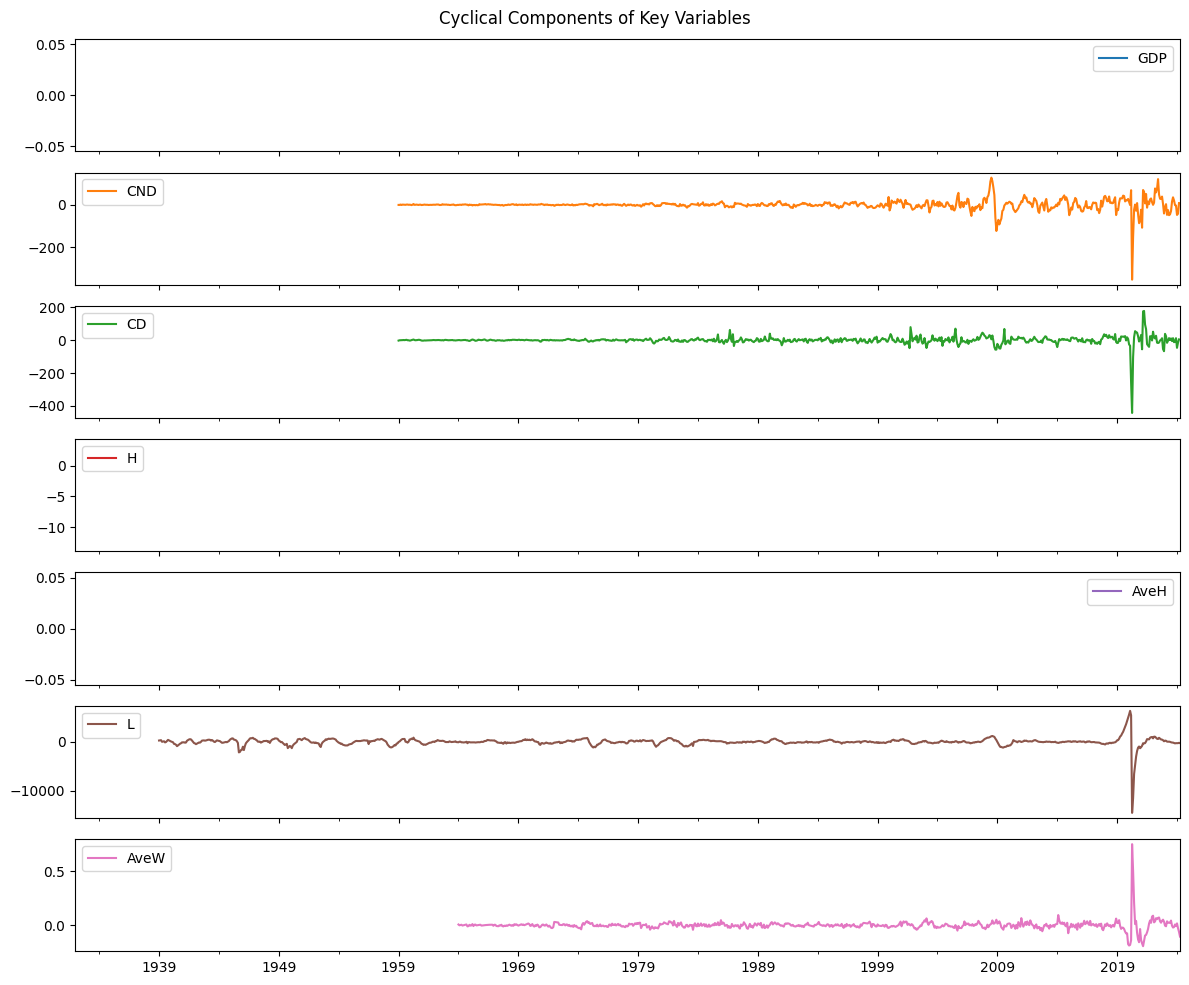

In [ ]:
# Plotting the cyclical component of key variables for visualization
cycle_df.plot(subplots=True, figsize=(12, 10), title='Cyclical Components of Key Variables')
plt.tight_layout()
plt.show()

#Table 2

##Replicating

In [ ]:
# Retrieve data from FRED
start_date = '1950-01-01'
end_date = '2023-12-31'

gdp = fred.get_series('GDPC1', start_date, end_date)
consumption = fred.get_series('PCEC', start_date, end_date)
investment = fred.get_series('GPDIC1', start_date, end_date)
hours_worked = fred.get_series('HOANBS', start_date, end_date)
real_wage = fred.get_series('LES1252881600Q', start_date, end_date)
real_interest_rate = fred.get_series('FEDFUNDS', start_date, end_date)
tfp = fred.get_series('RTFPNAUSA632NRUG', start_date, end_date)

In [ ]:
# Combine all data into a DataFrame
data = pd.DataFrame({
    'GDP': gdp,
    'Consumption': consumption,
    'Investment': investment,
    'Hours Worked': hours_worked,
    'Real Wage': real_wage,
    'Real Interest Rate': real_interest_rate,
    'TFP': tfp
}).dropna()

In [ ]:
for col in ['GDP', 'Consumption', 'Investment', 'Hours Worked', 'Real Wage', 'TFP']:
    if (data[col] <= 0).any():
        print(f"Warning: Column {col} contains zero or negative values. Adding a small constant for log transformation.")
        data[col] += 1e-6

In [ ]:
# Calculate GDP per labor hour
data['Y/N'] = data['GDP'] / data['Hours Worked']
data.head()

,GDP,Consumption,Investment,Hours Worked,Real Wage,Real Interest Rate,TFP,Y/N
1979-01-01,7238.727,1517.141,1014.607,66.782,335.0,10.07,0.801628,108.393384
1980-01-01,7341.557,1702.302,972.248,67.597,321.0,13.82,0.787553,108.607734
1981-01-01,7459.022,1885.734,992.376,67.348,314.0,19.08,0.792513,110.753430
1982-01-01,7295.631,2014.155,877.772,65.940,312.0,13.22,0.777433,110.640446
1983-01-01,7400.066,2184.589,829.672,65.555,315.0,8.68,0.792940,112.883319


In [ ]:
data

,GDP,Consumption,Investment,Hours Worked,Real Wage,Real Interest Rate,TFP,Y/N
1979-01-01,7238.727,1517.141,1014.607,66.782,335.0,10.07,0.801628,108.393384
1980-01-01,7341.557,1702.302,972.248,67.597,321.0,13.82,0.787553,108.607734
1981-01-01,7459.022,1885.734,992.376,67.348,314.0,19.08,0.792513,110.753430
1982-01-01,7295.631,2014.155,877.772,65.940,312.0,13.22,0.777433,110.640446
1983-01-01,7400.066,2184.589,829.672,65.555,315.0,8.68,0.792940,112.883319
1984-01-01,8034.847,2418.165,1154.826,70.233,313.0,9.56,0.810300,114.402731
1985-01-01,8400.820,2636.008,1169.416,72.497,314.0,8.35,0.817007,115.878174
1986-01-01,8749.127,2823.648,1224.404,73.457,321.0,8.14,0.825848,119.105422
1987-01-01,8986.367,2983.513,1205.858,75.107,328.0,6.43,0.826188,119.647530
1988-01-01,9367.502,3231.896,1227.008,76.920,329.0,6.83,0.834052,121.782397


In [ ]:
# Apply logarithms to relevant data
for col in ['GDP', 'Consumption', 'Investment', 'Hours Worked', 'Real Wage','Real Interest Rate', 'TFP', 'Y/N']:
    data[col] = np.log(data[col])

In [ ]:
# Apply HP filter to detrend the data
cycle, trend = {}, {}
for col in data.columns:
    #if col != 'Real Interest Rate':  # Do not apply log to real interest rate
    cycle[col], trend[col] = hpfilter(data[col], lamb=1600)

In [ ]:
# Calculate standard deviation of the cyclical component
std_dev = {col: cycle[col].std() for col in cycle}
relative_std_dev = {col: std_dev[col] / std_dev['GDP'] for col in cycle}

# Calculate first-order autocorrelation
autocorr = {col: cycle[col].autocorr(lag=1) for col in cycle}

# Calculate contemporaneous correlation with GDP
corr_with_gdp = {col: cycle[col].corr(cycle['GDP']) for col in cycle}

# Create a DataFrame for the results
table2 = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Relative SD': relative_std_dev,
    'Autocorrelation': autocorr,
    'Correlation with GDP': corr_with_gdp
})

In [ ]:
table2

,Standard Deviation,Relative SD,Autocorrelation,Correlation with GDP
GDP,0.026870,1.000000,0.751989,1.000000
Consumption,0.031695,1.179600,0.836184,0.412817
Investment,0.111148,4.136554,0.677852,0.808078
Hours Worked,0.036218,1.347910,0.780948,0.735763
Real Wage,0.020010,0.744720,0.699067,0.521737
Real Interest Rate,0.930547,34.631830,0.706203,0.515491
TFP,0.010918,0.406317,0.642452,0.687600
Y/N,0.024529,0.912894,0.840530,0.009045


##Table 2 Visualization

In [ ]:
# Create a new DataFrame for the cyclical component
cycle_df = pd.DataFrame(cycle)

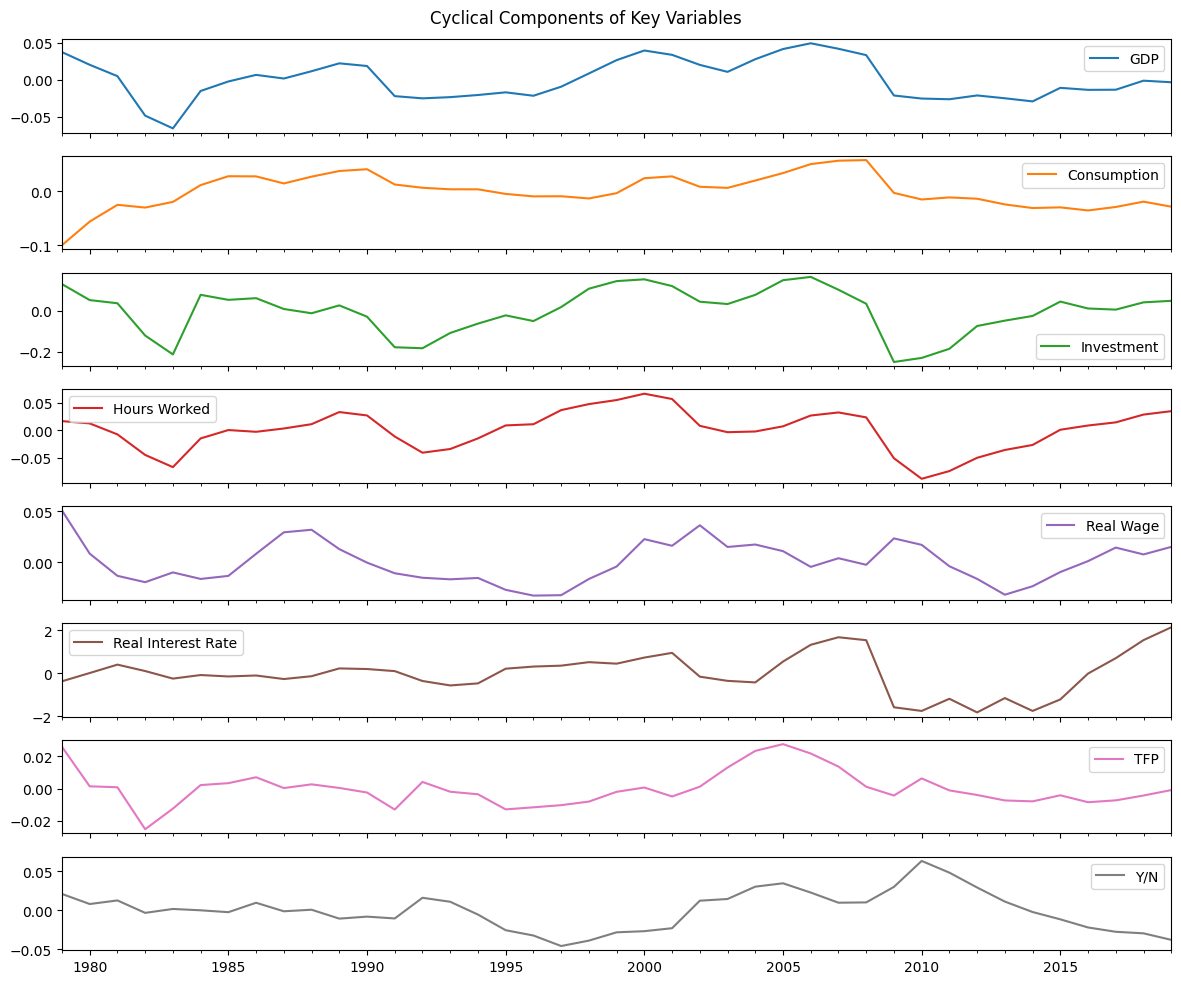

In [ ]:
# Plotting the cyclical component of key variables for visualization
cycle_df.plot(subplots=True, figsize=(12, 10), title='Cyclical Components of Key Variables')
plt.tight_layout()
plt.show()

#Saving Tables

In [ ]:

# Save tables to CSV
table1.to_csv('table1.csv')
table2.to_csv('table2.csv')

#TEST

In [ ]:
import statsmodels.api as sm

In [ ]:
data = {
    'GDP': fred.get_series('GDPC1', observation_start='1950-01-01', frequency='q'),
    'Consumption': fred.get_series('PCEC', observation_start='1950-01-01', frequency='q'),
    'Investment': fred.get_series('GPDIC1', observation_start='1950-01-01', frequency='q'),
    'Hours': fred.get_series('HOANBS', observation_start='1950-01-01', frequency='q'),
    'real_wage': fred.get_series('LES1252881600Q', observation_start='1950-01-01', frequency='q'),
    'real_interest_rate': fred.get_series('FEDFUNDS', observation_start='1950-01-01', frequency='q')
    #'tfp': fred.get_series('RTFPNAUSA632NRUG', observation_start='1950-01-01', frequency='q')
}

Standard Deviations (%):
                    Standard Deviation
GDP                           1.574912
Consumption                   1.381374
Investment                    6.619080
Hours                         2.062624
real_wage                     1.304414
real_interest_rate           55.963880

Cross-correlation with GDP:
          GDP  Consumption  Investment     Hours  real_wage  \
t-4  0.081704     0.020346   -0.040503  0.273892   0.112482   
t-3  0.285301     0.179157    0.143771  0.461178   0.079206   
t-2  0.527116     0.327100    0.386919  0.630081  -0.021978   
t-1  0.772709     0.508586    0.634142  0.778688  -0.158386   
t    1.000000     0.699263    0.844723  0.864868  -0.244480   
t+1  0.772709     0.481870    0.715881  0.608377  -0.046190   
t+2  0.527116     0.272380    0.535890  0.367724   0.033581   
t+3  0.285301     0.073756    0.346636  0.144008   0.081853   
t+4  0.081704    -0.075794    0.174879 -0.033410   0.130133   

     real_interest_rate  
t-4            0

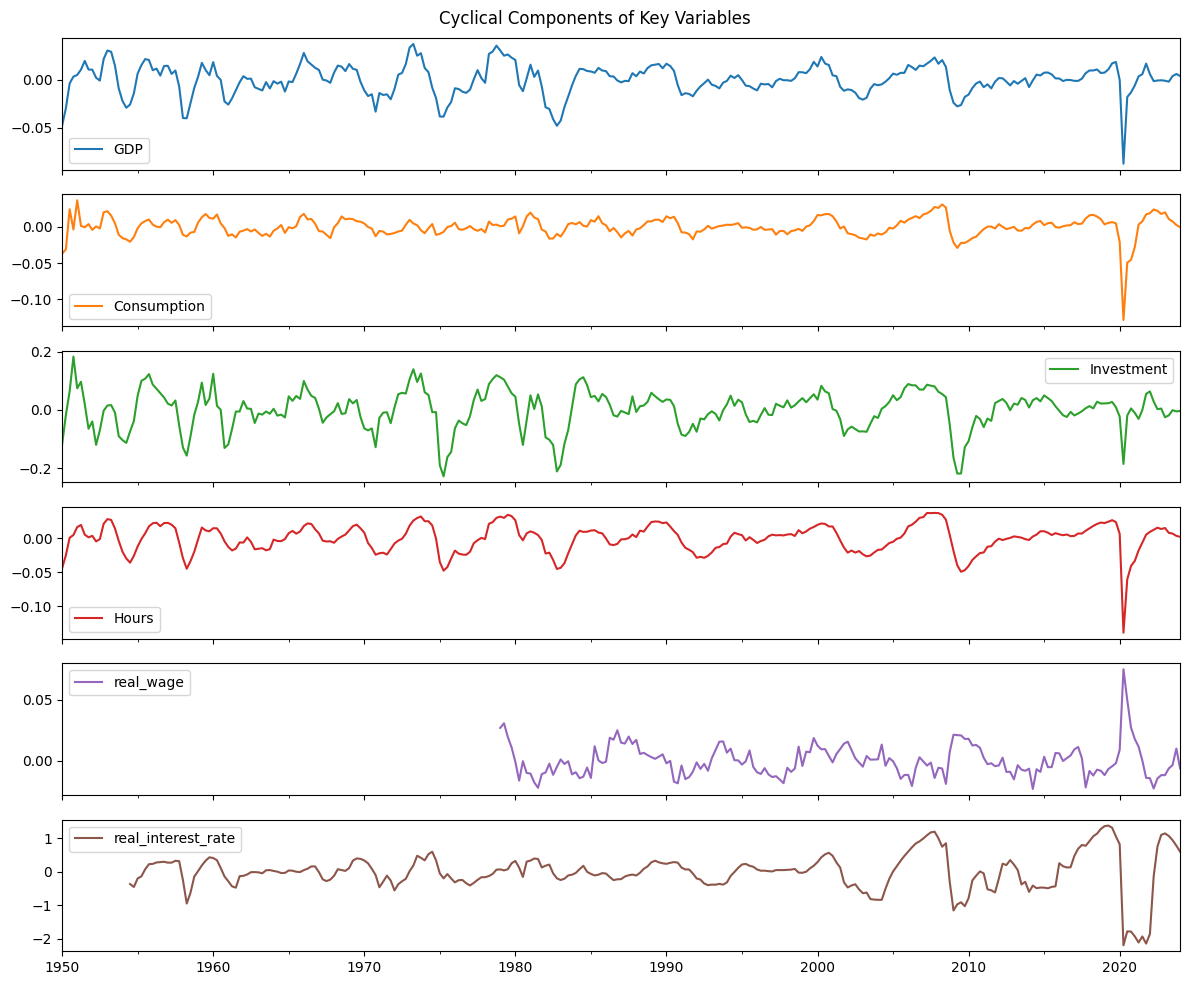

In [ ]:
# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Detrend the data using the HP filter
cycle, trend = {}, {}
for column in df.columns:
    cycle[column], trend[column] = sm.tsa.filters.hpfilter(np.log(df[column].dropna()), lamb=1600)

# Create a new DataFrame for the cyclical component
cycle_df = pd.DataFrame(cycle)

# Calculate the standard deviation and correlations
stats = pd.DataFrame(index=cycle_df.columns)
stats['Standard Deviation'] = cycle_df.std() * 100

# Cross-correlation with GDP
cross_corr = {}
for column in cycle_df.columns:
    cross_corr[column] = [cycle_df['GDP'].shift(-i).corr(cycle_df[column]) for i in range(-4, 5)]
cross_corr_df = pd.DataFrame(cross_corr, index=['t-4', 't-3', 't-2', 't-1', 't', 't+1', 't+2', 't+3', 't+4'])

# Display the results
print("Standard Deviations (%):")
print(stats)
print("\nCross-correlation with GDP:")
print(cross_corr_df)

# Plotting the cyclical component of key variables for visualization
cycle_df.plot(subplots=True, figsize=(12, 10), title='Cyclical Components of Key Variables')
plt.tight_layout()
plt.show()
